## Figure Guide

###Figure 1: NYC Incomes

a. NYC map with median household income 2010  
b. 3 sample income bin distributions NYC BG: rich, middle, poor  
c. NYC Income Distribution w/ fits 2010  

###Figure 2: Informational Quantities

a. NYC DKL map 2010  
b. Plot DKL Income for NYC, LA, Chicago  
c. USA Mutual Information 2010  

###Figure 3: Price Equation
a. theoretical (red) and actual price results for NYC 2010

###Supplemental Figures

####Maps (for select cities)

a. Median Income 2010  
b. DKL

####Other

* Scaling: Median
* Scaling: Variance
* Distribution fit tests




In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from census_tools import * #import census analysis and graphing tools
from modules import information

In [3]:
DATA_DIR_2010 = '../../CENSUSDATA/Data/United_States/' #US Data Directory
CENSUS_FILE = 'acs_bkgp_inc.csv' #Data File (ACS Income & Population by Block Group)

census2010 = pd.read_csv(DATA_DIR_2010 + CENSUS_FILE, index_col=False) # Create Dataframe
census2010['ID'] = census2010.apply(lambda x: 
                            str(x['STATE_ID']).zfill(2) + str(x['COUNTY_ID']).zfill(3) + str(x['TRACT_ID']).zfill(5) + str(x['BKGP_ID']).zfill(1), axis=1)

census2010 = census2010.set_index('ID', drop=False) # Set index but don't drop 80 

def rename_cols(x):
    if 'ACSHINC' in str(x):
        return x[:7] + x[7:].zfill(3)
    return x

#Pad income numbers so we get consistent sorting for cols
census2010 = census2010.rename(columns=rename_cols)

In [4]:
def run_information_calculations(df, **kwargs):
    _ = df.calculate_group_sums(**kwargs)
    _ = df.calculate_group_means(var_list=['ACSAVGHINC'])
    _ = df.calculate_group_variance(var_list=['ACSAVGHINC'])
    _ = df.nhood_weights()
    _ = df.dkl_y()
    _ = df.entropy_y()
    _ = df.entropy_y(conditional=False)
    _ = df.entropy_n()
    _ = df.mutual_info()
    return

census2010['log_ACSAVGHINC'] = np.log(census2010['ACSAVGHINC'])
census10 = information.CensusFrame(data=census2010)
run_information_calculations(census10, var_regex = '^ACSHINC([0-9])+$', var_list=['ACSTOTPOP', 'ACSTOTHH'])

In [5]:
census2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200120 entries, 01001201001 to 560419754006
Data columns (total 31 columns):
ID                200120 non-null object
BKGP_ID           200120 non-null int64
CITY_NAME         200120 non-null object
STATE             200120 non-null object
STATE_ID          200120 non-null int64
CITY_ID           200120 non-null int64
COUNTY_ID         200120 non-null int64
TRACT_ID          200120 non-null int64
ACSTOTPOP         200120 non-null int64
ACSTOTHH          200120 non-null int64
ACSHINC000        200120 non-null int64
ACSHINC010        200120 non-null int64
ACSHINC015        200120 non-null int64
ACSHINC020        200120 non-null int64
ACSHINC025        200120 non-null int64
ACSHINC030        200120 non-null int64
ACSHINC035        200120 non-null int64
ACSHINC040        200120 non-null int64
ACSHINC045        200120 non-null int64
ACSHINC050        200120 non-null int64
ACSHINC060        200120 non-null int64
ACSHINC075        200120 non-null i

In [21]:
city = census10.city_df
city['CITY_NAME'] = city.index
city[city['CITY_NAME'].str.contains('New York')].filter(regex='^H\(.\)')

,H(n),H(y)
CITY_NAME,,
"New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area (part)",13.630336,3.890867


In [58]:
# Figure Settings

IMAGE_SAVE_DIR = '../../SDI_Papers_shared/03_Statistics_Neighborhoods/Images/'

sns.set_style("white")
#sns.set_context('notebook', font_scale=1.5)
sns.set_context('paper', font_scale=1)

sns.set_palette(sns.color_palette("deep"))

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='serif')


def create_figure(ax, filename, save=True, SOM=True):
    if SOM:       
        sns.set_context('paper', font_scale=1)
    else:
        sns.set_context('paper', font_scale=1.5)
        
    fig = matplotlib.pyplot.gcf()
    
    ax.yaxis.grid(False) 
    ax.xaxis.grid(False)
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.5)
    if save and SOM:
        fig.savefig('{}/SOM/{}.pdf'.format(IMAGE_SAVE_DIR, filename), bbox_inches='tight')
    elif save:
        fig.savefig('{}/{}.pdf'.format(IMAGE_SAVE_DIR, filename), bbox_inches='tight')

1011
1063
1012


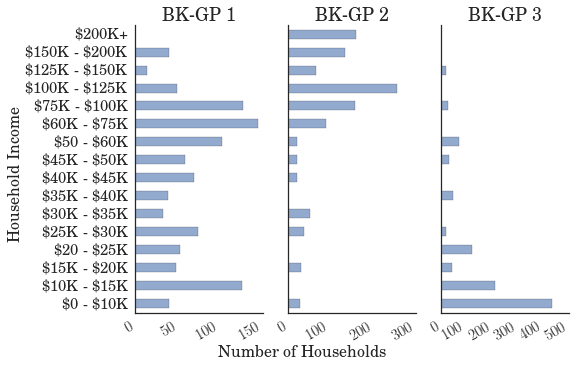

In [12]:
df = census2010

INC_BIN_REGEX = '^ACSHINC([0-9])+$'
example_hoods = ['36061028004','36061013001','36005173004']
titles = ['BK-GP 1','BK-GP 2', 'BK-GP 3']

## share y only
fig, axs = plt.subplots(1, 3, sharey=True, sharex=False)


for i, hood_id in enumerate(example_hoods):
    data =  df[df['ID'] == hood_id].filter(regex=INC_BIN_REGEX)
    print(data.sum().sum())
    count = data.sum(axis=1).values[0]
    ax = data.transpose().plot(kind='barh', ax=axs[i], alpha=0.6)
    
    ax.yaxis.grid(False) 
    ax.xaxis.grid(False)
    ax.set_title(titles[i])
    # hiding axis ticks
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.locator_params(axis='x',nbins=5)
    ax.get_lines()[0].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.set_xticklabels(['0','100','200','300'])
    ax.set_yticklabels(['\$0 - \$10K', '\$10K - \$15K', '\$15K - \$20K', '\$20K - \$25K',
                        '\$25K - \$30K','\$30K - \$35K',  '\$35K - \$40K',  '\$40K - \$45K',
                         '\$45K - \$50K', '\$50K - \$60K', '\$60K - \$75K', '\$75K - \$100K',
                         '\$100K - \$125K','\$125K - \$150K', '\$150K - \$200K', '\$200K+'])
    ax.legend().set_visible(False)


plt.tight_layout() 
fig.text(0.5, 0.1,'Number of Households' , ha='center', va='center', fontsize=16)
fig.text(0, 0.55,'Household Income', ha='center', va='center', rotation='vertical', fontsize=16)

#fig.suptitle('Sample NYC Block Groups')
#plt.subplots_adjust(top=0.93)

plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")  
fig.autofmt_xdate()

/Users/joe/.pyenv/versions/3.4.1/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


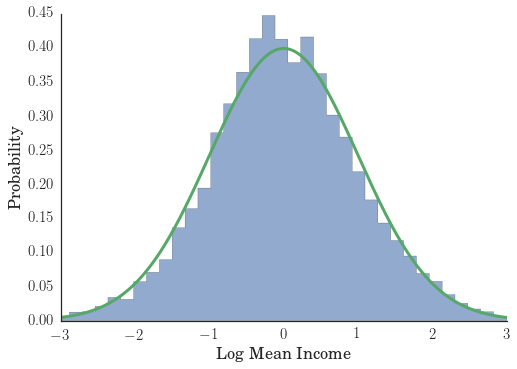

In [8]:
df = census2010

distributions = ['norm']
POP_COL = 'ACSTOTHH'

ny = df[df['CITY_NAME'].str.contains('New York')]
ny = ny[ny['ACSAVGHINC'].notnull()]
mean = ny[POP_COL].mean()
ny['ACSAVGHINC_adj'] = ny['ACSAVGHINC'] * (ny[POP_COL]/mean)
ny['ACSAVGHINC_adj'] = ny['ACSAVGHINC_adj'].dropna()

ax = plot_single_hist(ny['ACSAVGHINC_adj'], bins=55, logx=True, print_bic=False, xlim=[-3,3],
                    normalize=True, 
                    dist_names=distributions, skew_fit=False,  xlabel='Log Mean Income') 

ax.yaxis.grid(False) 

# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
matplotlib.rc('text', usetex=True)

           2
6.074e-11 x - 1.167e-05 x + 1.058


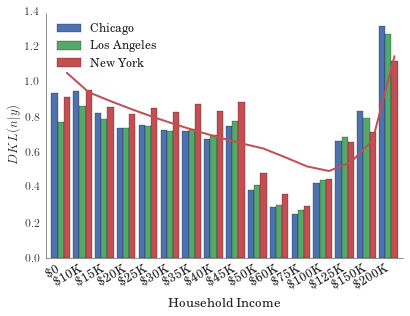

In [57]:
labels = ['\$0 - \$10K', '\$10K - \$15K', '\$15K - \$20K', '\$20K - \$25K',
                        '\$25K - \$30K','\$30K - \$35K',  '\$35K - \$40K',  '\$40K - \$45K',
                         '\$45K - \$50K', '\$50K - \$60K', '\$60K - \$75K', '\$75K - \$100K',
                         '\$100K - \$125K','\$125K - \$150K', '\$150K - \$200K', '\$200K+']
labels = ['\$0 - \$10K', '', '\$15K - \$20K', '',
                        '\$25K - \$30K','',  '\$35K - \$40K',  '',
                         '\$45K - \$50K', '', '\$60K - \$75K', '',
                         '\$100K - \$125K','', '\$150K - \$200K', '']
labels = ['\$0', '\$10K', '\$15K', '\$20K',
                        '\$25K','\$30K',  '\$35K',  '\$40K',
                         '\$45K', '\$50K', '\$60K', '\$75K',
                         '\$100K','\$125K', '\$150K', '\$200K']
bar_width = 0.85


city_data = census10.city_df
city_data['CITY_NAME'] = city_data.index
city_data = city_data.filter(regex='New York|Los Angeles|Chicago', axis=0)
city_data = city_data.rename(index=lambda x: x.split('-')[0])

fig, ax = plt.subplots(1,1)
    
city_data.filter(regex='^DKL').transpose().plot(kind='bar', ax=ax ,width=bar_width)
    
values = [int(col[-3:])*1000 for col in city_data.filter(regex='^DKL').columns]
midpoints = values[:-1] + np.diff(values)/2

x = values
y = city_data[city_data['CITY_NAME'].str.contains('New York')].filter(regex='^DKL').iloc[0].values

# Second order Polynomial
pf2 = np.polyfit(x, y, 2)
f2 = np.poly1d(pf2)
print(f2)
xx = [val + bar_width/3 for val in ax.get_xticks()]

ax.plot(xx,f2(x),color=sns.color_palette("deep")[2], lw=2)

plt.legend(loc='upper left', fancybox=True)

ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_ylabel('$DKL(n|y)$')
ax.set_xlabel('Household Income')
ax.get_lines()[0].set_visible(False)
ax.set_ylim(0,1.4)
create_figure(ax, '/Fig_2/DKL', SOM=False)

##Supplemental Figures


                            OLS Regression Results                            
Dep. Variable:                log_INC   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     436.4
Date:                Wed, 25 Mar 2015   Prob (F-statistic):           6.94e-80
Time:                        11:08:02   Log-Likelihood:                 469.17
No. Observations:                 941   AIC:                            -934.3
Df Residuals:                     939   BIC:                            -924.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
log_HH         0.0825      0.004     20.890      0.0

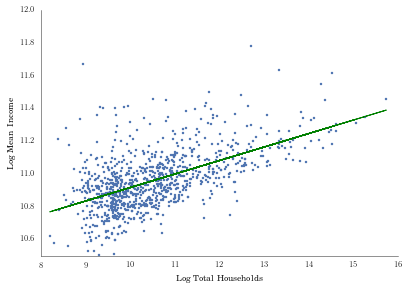

In [41]:
import statsmodels.api as sm

city_df = census10.city_df
city_df['log_HH'] = np.log(city_df['ACSTOTHH'])
city_df['log_INC'] = np.log(city_df['ACSAVGHINC_weighted'])

ax = city_df.plot('log_HH', 'log_INC', kind='scatter', lw = 0, s=6)

city_df['Eins'] = np.ones(( len(city_df), ))
Y = city_df.log_INC[:-1]
X = city_df[['log_HH','Eins']][:-1]
result = sm.OLS( Y, X ).fit()
print(result.summary())
ax.plot(X['log_HH'], result.fittedvalues,'g', lw = 1, label="OLS Reg")

ax.set_xlabel('Log Total Households')
ax.set_ylabel('Log Mean Income')

ax.set_ylim(10.5,12)
ax.set_xlim(8,16)

create_figure(ax, 'Scaling_Income_Mean')

                               OLS Regression Results                              
Dep. Variable:     ACSAVGHINC_weighted_var   R-squared:                       0.235
Model:                                 OLS   Adj. R-squared:                  0.234
Method:                      Least Squares   F-statistic:                     288.4
Date:                     Wed, 25 Mar 2015   Prob (F-statistic):           1.30e-56
Time:                             11:47:51   Log-Likelihood:                 557.02
No. Observations:                      941   AIC:                            -1110.
Df Residuals:                          939   BIC:                            -1100.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lo

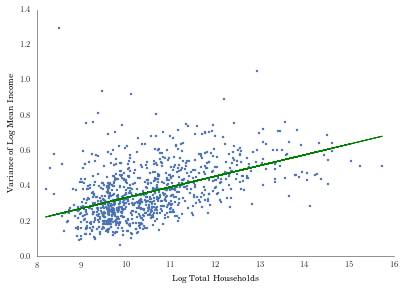

In [77]:
city_df = census10.city_df
#city_df = city_df[city_df['log_ACSAVGHINC_weighted_var'] < 100]
city_df['log_HH'] = np.log(city_df['ACSTOTHH'])

ax = city_df.plot('log_HH', 'ACSAVGHINC_weighted_var', kind='scatter', lw = 0, s=6)

city_df['Eins'] = np.ones(( len(city_df), ))
Y = city_df.ACSAVGHINC_weighted_var[:-1]
X = city_df[['log_HH','Eins']][:-1]
result = sm.OLS( Y, X ).fit()
print(result.summary())
ax.plot(X['log_HH'], result.fittedvalues,'g', lw = 1, label="OLS Reg")

ax.set_xlabel('Log Total Households')
ax.set_ylabel('Variance of Log Mean Income')

ax.set_ylim(0,1.4)
ax.set_xlim(8,16)

create_figure(ax, 'Scaling_Variance')

In [12]:
import re
from IPython.display import Latex
mi = city_df[['MI', 'ACSTOTPOP']].copy()
mi.reset_index(level=0, inplace=True)
mi = mi.sort(['MI'], ascending=False)
mi['CITY_TYPE'] = mi['CITY_NAME'].apply(lambda x: re.search('Micro|Metro',x).group(0).replace('(part)',''))
mi['CITY_NAME'] = mi['CITY_NAME'].apply(lambda x: re.split('Micro|Metro',x)[0])
table = mi[mi['CITY_TYPE'].str.contains('Micro')][:10]
#latex = table.to_latex(index=False)
#Latex(latex)
table

,CITY_NAME,MI,ACSTOTPOP,CITY_TYPE
463,"Lamesa, TX",0.774897,13853,Micro
78,"Beeville, TX",0.763742,31896,Micro
72,"Bay City, TX",0.723584,36647,Micro
380,"Hobbs, NM",0.710591,62503,Micro
256,"Edwards, CO",0.690017,57832,Micro
908,"Wauchula, FL",0.680996,27521,Micro
348,"Greenville, MS",0.651074,52455,Micro
37,"Arcadia, FL",0.649121,34557,Micro
176,"Clewiston, FL",0.648452,39030,Micro
178,"Clovis, NM",0.645864,46924,Micro


In [10]:
distributions = ['norm', 'expon', 'exponweib', 'lognorm', 'genlogistic']
dist_ranks = calculate_bic_ranks(census2010, 'CITY_NAME', 'ACSAVGHINC', min_obs=500, log=False,
                      normalize=True, adjusted=True, dist_names=distributions)

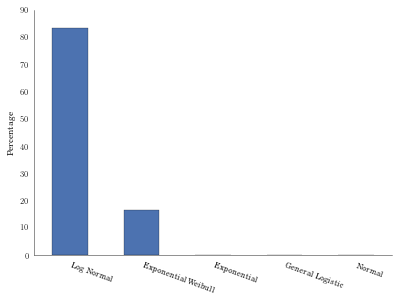

In [12]:
ax = dist_ranks['First'].plot(kind='bar', rot=-20)

# CHECK ORDER of labels
xlabels = ['Log Normal', 'Exponential Weibull','Exponential', 'General Logistic', 'Normal']

ax.set_ylabel('Percentage')
ax.set_xticklabels(xlabels, ha='left')

ax.get_lines()[0].set_visible(False) # get rid of stupid stupid pandas line

create_figure(ax, 'fit_tests_first')

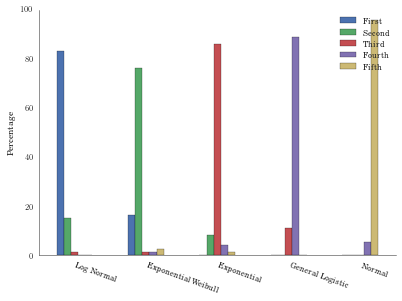

In [13]:
ax = dist_ranks.plot(kind='bar', rot=-20)

# CHECK ORDER of labels
xlabels = ['Log Normal', 'Exponential Weibull','Exponential', 'General Logistic', 'Normal']

ax.set_ylabel('Percentage')
ax.set_xticklabels(xlabels, ha='left')

ax.get_lines()[0].set_visible(False) # get rid of stupid stupid pandas line

create_figure(ax, 'fit_tests_all')

## Price Calculations

In [29]:
from modules import price

nhoods = census10.nhood_df
nyc = nhoods[nhoods['CITY_NAME'].str.contains('New York')]
nyc = nyc[nyc['ACSAVGHINC'].notnull()] # INVESTIGATE THESE BKGPS!!!!
nyc['Total_Households'] = nyc.filter(regex='^ACSHINC([0-9])+$').sum(axis=1)

nyc = price.calculate_price(nyc)

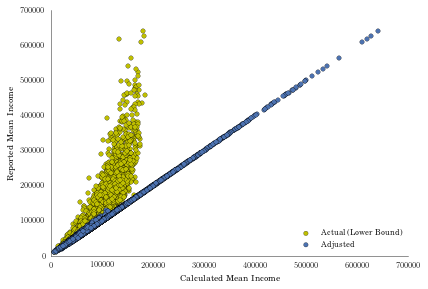

In [30]:
ax = nyc.plot('mean_inc_low','ACSAVGHINC', kind='scatter', c='y', label='Actual (Lower Bound)')
ax = nyc.plot('adjusted_low','ACSAVGHINC', kind='scatter', ax=ax, label='Adjusted')

ax.legend(loc=4, fancybox=True)
ax.set_ylabel('Reported Mean Income')
ax.set_xlabel('Calculated Mean Income')
ax.set_xlim([0, 700000])
ax.set_ylim([0, 700000])

create_figure(ax, 'price_calculation_adjustment')

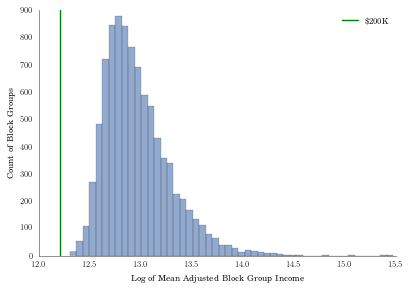

In [54]:
#ax = (nyc[nyc['ACSHINC200_low'] > 200000]['ACSHINC200_low']/100000).hist(bins=50, alpha=0.6)
ax = np.log(nyc[nyc['ACSHINC200'] > 0]['new_mid_pt_low']).hist(bins=50, alpha=0.6)
ax.axvline(np.log(200000), label='\$200K', c='g')

ax.legend(fancybox=True)
ax.set_xlabel("Log of Mean Adjusted Block Group Income")
ax.set_ylabel('Count of Block Groups')

create_figure(ax, 'price_rich_bins')

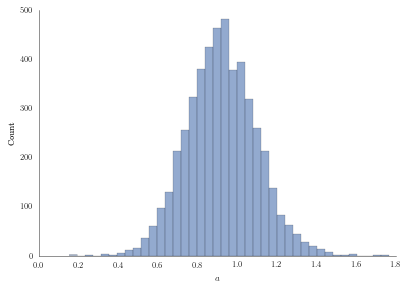

In [59]:
ax = nyc[nyc['a']>0]['a'].hist(bins=40, alpha=0.6)

ax.set_xlabel("$a$")
ax.set_ylabel('Count')

create_figure(ax, 'price_a_value')

In [22]:

import os
directory = '../../SDI_Papers_Shared/03_Statistics_Neighborhoods/Images/SOM/Maps'
extension = ".png"
files = [file for file in os.listdir(directory) if file.lower().endswith(extension)]


for dkl,income in zip(files[::2],files[1::2]):
    name = income.split('.')[0].replace('_',' ')
    print('\\begin{figure}')
    print('\t\centering')
    print('\t\includegraphics[width=\\textwidth]{{Images/SOM/maps/{}}}'.format(income))
    print('\t\caption{{{}}}'.format(name))
    print('\t\label{{fig:{}}}'.format(name))
    print('\end{figure}')
    
    name = dkl.split('.')[0].replace('_',' ')
    print('\\begin{figure}')
    print('\t\centering')
    print('\t\includegraphics[width=\\textwidth]{{Images/SOM/maps/{}}}'.format(dkl))
    print('\t\caption{{{}}}'.format(name))
    print('\t\label{{fig:{}}}'.format(name))
    print('\end{figure}\n')

\begin{figure}
	\centering
	\includegraphics[width=\textwidth]{Images/SOM/maps/atl_income_10.png}
	\caption{atl income 10}
	\label{fig:atl income 10}
\end{figure}
\begin{figure}
	\centering
	\includegraphics[width=\textwidth]{Images/SOM/maps/atl_dkl_10.png}
	\caption{atl dkl 10}
	\label{fig:atl dkl 10}
\end{figure}

\begin{figure}
	\centering
	\includegraphics[width=\textwidth]{Images/SOM/maps/autstin_income_10.png}
	\caption{autstin income 10}
	\label{fig:autstin income 10}
\end{figure}
\begin{figure}
	\centering
	\includegraphics[width=\textwidth]{Images/SOM/maps/austin_dkl_10.png}
	\caption{austin dkl 10}
	\label{fig:austin dkl 10}
\end{figure}

\begin{figure}
	\centering
	\includegraphics[width=\textwidth]{Images/SOM/maps/boston_income_10.png}
	\caption{boston income 10}
	\label{fig:boston income 10}
\end{figure}
\begin{figure}
	\centering
	\includegraphics[width=\textwidth]{Images/SOM/maps/boston_dkl_10.png}
	\caption{boston dkl 10}
	\label{fig:boston dkl 10}
\end{figure}

\begin{